Group Members:

Alisha Zahra Saadiya - 2501971742

Diva Nabila Henryka	- 2501975620

Lovina Anabelle Citra	- 2540121322

---

Topic Prediction Modeling on E-Commerce Applications' Google Play Store Reviews

## Install and Import Libraries

In [ ]:
!pip install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 22.1 MB/s eta 0:00:00


In [ ]:
!pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 5.3 MB/s eta 0:00:00


In [ ]:
# Data Manipulation
import numpy as np
import pandas as pd

# Visualization and Printing
import seaborn as sns
from pprint import pprint
import matplotlib.pyplot as plt

# Text Preprocessing
import re
import emoji
import nltk
from nltk import punkt
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer

# Machine Learning (Splitting, Vectorizer, MDS Plot)
from sklearn.manifold import MDS
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

# Topic Modelling & Text Preprocessing (Stopwords)
import gensim
from gensim import corpora, models
from gensim.models import LsiModel
from gensim.corpora import Dictionary
from gensim.models import CoherenceModel
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

# Topic Models Visualization
import pyLDAvis
import pyLDAvis.gensim
from wordcloud import WordCloud

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

import os
import pickle as pkl

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

## Text Exploration

### Read the Data
Before the data can be read, it has to be uploaded first to the Google Colab's file system.

In [ ]:
df = pd.read_csv("[ENG]scrapped_data_AppShopping.csv")
df.head()

userName  score                   at  \
0      mikumikuda      1  2024-05-28 13:10:08   
1  Kristine Jatta      5  2024-05-28 12:04:34   
2    Clive Rellin      4  2024-05-28 11:19:04   
3     MARY DIVINE      5  2024-05-28 10:34:11   
4   JEDI Mirakuru      5  2024-05-28 08:00:47   

                                             content app_name  
0  The UI is a mess! Sometimes the product don't ...   Lazada  
1  I love 💕 the app because day are many beautifu...  Alibaba  
2  I love the app but it's just repeating the sam...   Lazada  
3  The Electric Bill Payment via this app is amaz...   Lazada  
4                                   Best Online Shop   Blibli

### Frequency of Each Application's User Reviews

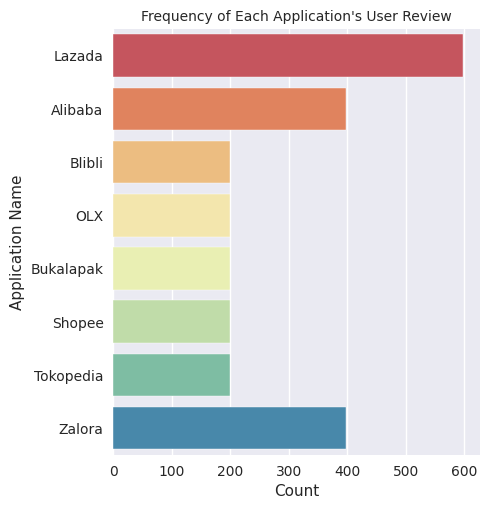

In [ ]:
sns.set_style("darkgrid")
graph = sns.catplot(data = df, y = "app_name", kind = "count", palette = "Spectral")
plt.ylabel("Application Name")
plt.xlabel("Count")
plt.title("Frequency of Each Application's User Review", size = 10)
plt.show()

The output from the bar graph above shows that most of the dataset came from Lazada with around 600 reviews. Alibaba and Zalore are next with around 400 reviews and the rest make up the dataset at around 200 reviews. This means that the data distribution is imbalanced.

### Frequency of User Reviews' Length

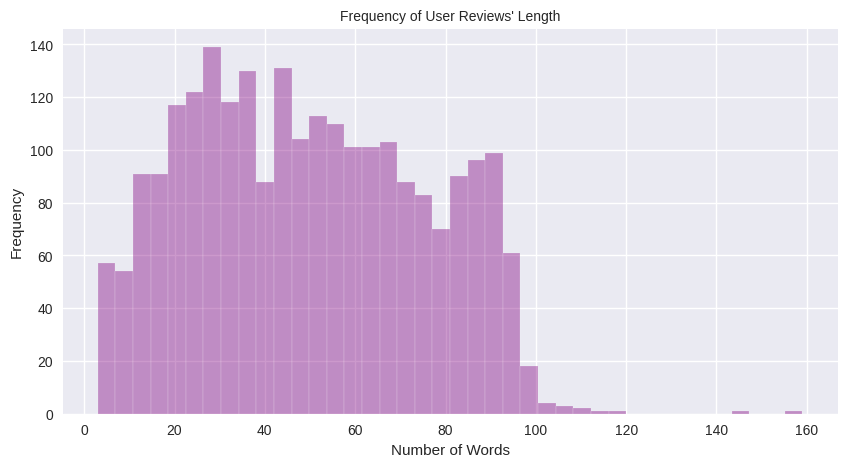

In [ ]:
num_words = df["content"].apply(lambda x:len(str(x).split()))

plt.style.use("seaborn-v0_8-darkgrid")
plt.figure(figsize = (10, 5))
sns.distplot(num_words, kde = False, color="purple", bins = 40)
plt.title("Frequency of User Reviews' Length", size=10)
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

The output from the bar graph above shows that most of the user reviews length ranging from 5 to 160 words. But mostly distributed around the 5 to 90 words mark, the rest are just in small occurrences.

## Text Preprocessing

### Train-Test Split
The dataset is first splitted into two sets, training and testing, with 80-20 ratio and random state of 42.

In [ ]:
x_train, x_test = train_test_split(df['content'], test_size = 0.2, random_state = 42)

In [ ]:
x_train

985     What happened since the update?? Everything is...
1033                              The ads really annoying
275     I like the fact that you sell almost everythin...
782     It's seems like the prices and the products ar...
677     Gave this app one more chance. Waited half a m...
                              ...                        
1638    Im disappointed in Zalora now. Been using it f...
1095    It's no use anymore if you need help there cus...
1130    service is good overall, however there're some...
1294    Idk why the search result seems not correct. E...
860     I have the app already downloaded on my phone ...
Name: content, Length: 1910, dtype: object

In [ ]:
x_test

544     We can import all goods to india from this app...
1911    Nice app to search for second use cars. But I ...
1493    Worst shopping experience. The shoes haven't b...
2383    Bukalapak did not respond to my complain about...
744     Suppliers don't have goods nor they provide be...
                              ...                        
1826    Zalora was one of my fave online shopping plac...
1501    Non compliant to all customer queries, long wa...
1637    Easy .. good entreface .. good offers . But do...
1551    This app doesn't helpful at all this isn't con...
528     hi shopee, please review all function in your ...
Name: content, Length: 478, dtype: object

### Text Cleaning
There are several steps to clean the data, which are: converting to lowercase and removing URLs, numbers,
symbols, emojis, extra spaces and leading or trailing whitespaces.


In [ ]:
def cleaning(text):
  # to lower case
  text_clean = text.str.lower()

  # to remove URLs
  text_clean = [re.sub(r'http\S+', '', i) for i in text_clean]

  # to remove numbers
  text_clean = [re.sub(r"\d+", "",i ) for i in text_clean]

  # to remove symbols
  text_clean = [re.sub(r'[^\w]', ' ', i) for i in text_clean]

  # to remove emojis
  text_clean = [emoji.replace_emoji(i, replace='') for i in text_clean]

  # to remove extra spaces
  text_clean = [re.sub(r'\s+', ' ', i) for i in text_clean]

  # to remove leading or trailing whitespaces
  text_clean = [i.strip() for i in text_clean]

  return text_clean

In [ ]:
data_cleaned = cleaning(x_train)
data_cleaned

['what happened since the update everything is just loading screen so i tried uninstalling and installing it now i cannot login anymore my internet was perfectly fine tho please fix',
 'the ads really annoying',
 'i like the fact that you sell almost everything i can think of i would definitely give it a try',
 'it s seems like the prices and the products are in reasonable and it s good quality i m gonna order soon',
 'gave this app one more chance waited half a month for my order got canceled times because courier delivery time ran out or courier couldn t reach you my order was labeled as failed delivery and i won t receive my order anymore i wasted a half a month for nothing so i guess i m going back to shopee where i never had this problem',
 'poor customer service and too many scammers in this app they tag my case resolve without update about my concern i received a parcel which i didn t order and their response is only email and need to submit valid id in which i did but there s n

### Tokenization, Lemmatization, and Filtering
Tokenize the strings into words, reduce the tokens to their base form (lemmatization), and filter out the stopwords and words that have less than three occurrences in one function.

The purpose of this is to identify the relationships between words in each review, ensuring words with similar meanings (synonyms) are grouped together, and focuses on the more content-rich words which all leads to accurate and clearer topics.

In [ ]:
lemma = WordNetLemmatizer()

In [ ]:
def preprocess(texts):
    result = []
    for token in gensim.utils.simple_preprocess(texts):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemma.lemmatize(token, pos = "v"))
    return result

In [ ]:
processed_data = []
for i in range(len(data_cleaned)):
  processed_data.append(preprocess(data_cleaned[i]))

processed_data

[['happen',
  'update',
  'load',
  'screen',
  'try',
  'uninstalling',
  'instal',
  'login',
  'anymore',
  'internet',
  'perfectly',
  'fine'],
 ['annoy'],
 ['like', 'fact', 'sell', 'think', 'definitely'],
 ['like',
  'price',
  'products',
  'reasonable',
  'good',
  'quality',
  'gonna',
  'order',
  'soon'],
 ['give',
  'chance',
  'wait',
  'half',
  'month',
  'order',
  'cancel',
  'time',
  'courier',
  'delivery',
  'time',
  'courier',
  'couldn',
  'reach',
  'order',
  'label',
  'fail',
  'delivery',
  'receive',
  'order',
  'anymore',
  'waste',
  'half',
  'month',
  'guess',
  'go',
  'shopee',
  'problem'],
 ['poor',
  'customer',
  'service',
  'scammers',
  'case',
  'resolve',
  'update',
  'concern',
  'receive',
  'parcel',
  'order',
  'response',
  'email',
  'need',
  'submit',
  'valid',
  'update',
  'week',
  'poor',
  'customer',
  'service'],
 ['slowass',
  'load',
  'feature',
  'pay',
  'installment',
  'excuse',
  'antusiasme',
  'penguniung',
  'v

## Build Dictionary and Corpus

### Build Dictionary
The dictionary that is created is a filtered dictionary where words that appear less than 5 times in the entire collection of texts or in more than half of the documents are removed, focusing on the more informative terms within the texts.

In [ ]:
def build_dictionary(texts):
  dictionary = Dictionary(texts)
  dictionary.filter_extremes(no_below = 5, no_above = 0.5)

  return dictionary

In [ ]:
dictionary = build_dictionary(processed_data)

In [ ]:
for key, value in dictionary.items():
  print(f"Key: {key}, Value: {value}")

Key: 0, Value: anymore
Key: 1, Value: fine
Key: 2, Value: happen
Key: 3, Value: instal
Key: 4, Value: internet
Key: 5, Value: load
Key: 6, Value: login
Key: 7, Value: perfectly
Key: 8, Value: screen
Key: 9, Value: try
Key: 10, Value: uninstalling
Key: 11, Value: update
Key: 12, Value: annoy
Key: 13, Value: definitely
Key: 14, Value: fact
Key: 15, Value: like
Key: 16, Value: sell
Key: 17, Value: think
Key: 18, Value: gonna
Key: 19, Value: good
Key: 20, Value: order
Key: 21, Value: price
Key: 22, Value: products
Key: 23, Value: quality
Key: 24, Value: reasonable
Key: 25, Value: soon
Key: 26, Value: cancel
Key: 27, Value: chance
Key: 28, Value: couldn
Key: 29, Value: courier
Key: 30, Value: delivery
Key: 31, Value: fail
Key: 32, Value: give
Key: 33, Value: go
Key: 34, Value: guess
Key: 35, Value: half
Key: 36, Value: month
Key: 37, Value: problem
Key: 38, Value: reach
Key: 39, Value: receive
Key: 40, Value: shopee
Key: 41, Value: time
Key: 42, Value: wait
Key: 43, Value: waste
Key: 44, Va

### Build Corpus (BoW Only and Additional TF-IDF)

#### Bag of Words (BoW Corpus)
This method converts a text document into a BOW numerical representation. It creates a list of tuples where the first element is the index from the dictionary and the second element is the word’s frequency within that specific document.

In [ ]:
def build_corpus(dictionary, texts):
  corpus = [dictionary.doc2bow(text) for text in texts]

  return corpus

In [ ]:
corpus_bow = build_corpus(dictionary, processed_data)

In [ ]:
for doc in corpus_bow:
  print(doc)

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1)]
[(12, 1)]
[(13, 1), (14, 1), (15, 1), (16, 1), (17, 1)]
[(15, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1)]
[(0, 1), (20, 3), (26, 1), (27, 1), (28, 1), (29, 2), (30, 2), (31, 1), (32, 1), (33, 1), (34, 1), (35, 2), (36, 2), (37, 1), (38, 1), (39, 1), (40, 1), (41, 2), (42, 1), (43, 1)]
[(11, 2), (20, 1), (39, 1), (44, 1), (45, 1), (46, 2), (47, 1), (48, 1), (49, 1), (50, 2), (51, 1), (52, 1), (53, 1), (54, 2), (55, 1), (56, 1), (57, 1)]
[(5, 1), (46, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1)]
[(9, 1), (47, 1), (64, 3), (65, 2), (66, 1), (67, 1), (68, 2), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 2), (79, 1)]
[(21, 1), (80, 1), (81, 1), (82, 1), (83, 1)]
[(19, 1), (48, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1)]
[(41, 1), (43

In [ ]:
for doc_id, doc in enumerate(corpus_bow):
    print(f"\nDocument {doc_id + 1}:")
    for word_id, count in doc:
      word = dictionary.get(word_id, "<UNKNOWN>")
      print(f"  - Word: {word} (ID: {word_id}) - Count: {count}")

Streaming output truncated to the last 5000 lines.
  - Word: feel (ID: 282) - Count: 1
  - Word: purchase (ID: 301) - Count: 1
  - Word: great (ID: 325) - Count: 1
  - Word: lot (ID: 444) - Count: 1
  - Word: deal (ID: 630) - Count: 1

Document 1618:
  - Word: order (ID: 20) - Count: 1
  - Word: area (ID: 136) - Count: 1
  - Word: items (ID: 143) - Count: 2
  - Word: filter (ID: 153) - Count: 2
  - Word: stuff (ID: 168) - Count: 1
  - Word: best (ID: 198) - Count: 1
  - Word: ship (ID: 217) - Count: 1
  - Word: frustrate (ID: 220) - Count: 1
  - Word: favorite (ID: 238) - Count: 1
  - Word: fee (ID: 414) - Count: 1
  - Word: thank (ID: 524) - Count: 1
  - Word: deal (ID: 630) - Count: 1
  - Word: suggestion (ID: 948) - Count: 1
  - Word: cut (ID: 1006) - Count: 1

Document 1619:
  - Word: order (ID: 20) - Count: 4
  - Word: price (ID: 21) - Count: 1
  - Word: cancel (ID: 26) - Count: 1
  - Word: give (ID: 32) - Count: 1
  - Word: go (ID: 33) - Count: 1
  - Word: need (ID: 48) - Count: 

#### Build Additional TF-IDF Corpus from the BoW Corpus
This method converts the BOW corpus and transforms it into a TF-IDF weighted corpus which helps identify which words are most important and informative for each document compared to the entire collection. Similar to the BOW method, the first element is the index but the second element is the TF-IDF weight.

In [ ]:
def build_tfidf(corpus):
  tfidf = models.TfidfModel(corpus)
  corpus_tfidf = tfidf[corpus]

  return corpus_tfidf

In [ ]:
corpus_tfidf = build_tfidf(corpus_bow)

In [ ]:
for doc in corpus_tfidf:
  print(doc)

[(0, 0.25881805137184705), (1, 0.2975980888097998), (2, 0.23451969685401172), (3, 0.334319843554631), (4, 0.3179567702120762), (5, 0.24458062848651355), (6, 0.30458716581088335), (7, 0.4226069358035396), (8, 0.26285557415466765), (9, 0.1900718759290703), (10, 0.3380811708845116), (11, 0.1608537954274291)]
[(12, 1.0)]
[(13, 0.5713983990373379), (14, 0.5641548069136061), (15, 0.23287848338329734), (16, 0.402083557110325), (17, 0.37326886890342514)]
[(15, 0.19115057018222115), (18, 0.48210927823868677), (19, 0.18554485087654365), (20, 0.16811905581714068), (21, 0.2316396992321828), (22, 0.24952059203692203), (23, 0.3361685196074776), (24, 0.4893772981555792), (25, 0.44712895802393354)]
[(0, 0.1631763686190752), (20, 0.23775532641306132), (26, 0.11887426995052217), (27, 0.25931323301426173), (28, 0.21564882803067964), (29, 0.31844500487269584), (30, 0.2209959508371099), (31, 0.17328682069788845), (32, 0.14388375040352955), (33, 0.13591014135400448), (34, 0.2043163120470396), (35, 0.4768340

In [ ]:
for doc_id, doc in enumerate(corpus_tfidf):
    print(f"\nDocument {doc_id + 1}:")
    for word_id, weight in doc:
      word = dictionary.get(word_id, "<UNKNOWN>")
      print(f"  - Word: {word} (ID: {word_id}) - Weight: {weight}")

Streaming output truncated to the last 5000 lines.
  - Word: feel (ID: 282) - Weight: 0.3719550493341808
  - Word: purchase (ID: 301) - Weight: 0.2882311156008025
  - Word: great (ID: 325) - Weight: 0.2673282597394182
  - Word: lot (ID: 444) - Weight: 0.3921381293049882
  - Word: deal (ID: 630) - Weight: 0.3742621329958859

Document 1618:
  - Word: order (ID: 20) - Weight: 0.10767807700259538
  - Word: area (ID: 136) - Weight: 0.30039700726128077
  - Word: items (ID: 143) - Weight: 0.26757927391298014
  - Word: filter (ID: 153) - Weight: 0.39397626461497304
  - Word: stuff (ID: 168) - Weight: 0.22170503412372863
  - Word: best (ID: 198) - Weight: 0.20009072511500942
  - Word: ship (ID: 217) - Weight: 0.15615456027787536
  - Word: frustrate (ID: 220) - Weight: 0.22882374539167408
  - Word: favorite (ID: 238) - Weight: 0.2965888877435216
  - Word: fee (ID: 414) - Weight: 0.28331556314760714
  - Word: thank (ID: 524) - Weight: 0.1878481120853694
  - Word: deal (ID: 630) - Weight: 0.239775

## Model Building

### Output Preparation (Coherence Score and Topics)
Below are some functions to help output the topic modelling result, coherence score and topics (topic with weights and wordcloud)

In [ ]:
def coherence_score(model, texts, dictionary):
    coherence_model = CoherenceModel(model = model,
                                         texts = texts,
                                         dictionary = dictionary,
                                         coherence='c_v')
    coherence_lda = coherence_model.get_coherence()

    return coherence_lda

In [ ]:
def model_topics(model):
  topics = model.show_topics(num_words = 10, formatted = True)

  for topic_num, topic in topics:
    print(f"Topic {topic_num}:")

    words = [word.split('*')[1].strip().replace('"', '') for word in topic.split('+')]
    weights = [word.split('*')[0].strip().replace('"', '') for word in topic.split('+')]
    topic_words_weights = [f"{words[i]}: {weights[i]}" for i in range(len(words))]
    print("\n".join(topic_words_weights))

    print()

In [ ]:
list_colors = ["#f94144", "#f8961e", "#ffe66d", "#43aa8b", "#3f37c9", "#7209b7"]

wc = WordCloud(
      background_color = "white",
      max_words = 10,
      max_font_size = 300,
      prefer_horizontal = 1.0,
      color_func=lambda *args, **kwargs: list_colors[i],
)

### Test Data Preparation
Apply the same process that has been done to the training set

In [ ]:
test_cleaned = cleaning(x_test)
test_cleaned

['we can import all goods to india from this app also excellent service providers iam really happy to do business with alibaba',
 'nice app to search for second use cars but i dont think that the option is really in good condition i need more ads that show what the minus and the plus from the option',
 'worst shopping experience the shoes haven t been shipped and it s been weeks plus there s no option to easily cancel the order from the app or the email they sent telling me the order hasnt been shipped i m telling everyone zalora socks',
 'bukalapak did not respond to my complain about the product which was broken when i received it no respond from the seller nor bukalapak but suddendly the case had been closed without any solution i will never used this app again untrusted app',
 'suppliers don t have goods nor they provide better prices now nothing on alibaba is as before years give easy payment options for indian customers also with upi',
 'i enjoyed scrolling through the different 

In [ ]:
test_processed = []
for i in range(len(test_cleaned)):
  test_processed.append(preprocess(test_cleaned[i]))

test_processed

[['import',
  'goods',
  'india',
  'excellent',
  'service',
  'providers',
  'happy',
  'business',
  'alibaba'],
 ['nice',
  'search',
  'second',
  'cars',
  'dont',
  'think',
  'option',
  'good',
  'condition',
  'need',
  'minus',
  'plus',
  'option'],
 ['worst',
  'shop',
  'experience',
  'shoe',
  'haven',
  'ship',
  'weeks',
  'plus',
  'option',
  'easily',
  'cancel',
  'order',
  'email',
  'send',
  'tell',
  'order',
  'ship',
  'tell',
  'zalora',
  'sock'],
 ['bukalapak',
  'respond',
  'complain',
  'product',
  'break',
  'receive',
  'respond',
  'seller',
  'bukalapak',
  'suddendly',
  'case',
  'close',
  'solution',
  'untrusted'],
 ['suppliers',
  'goods',
  'provide',
  'better',
  'price',
  'alibaba',
  'years',
  'easy',
  'payment',
  'options',
  'indian',
  'customers'],
 ['enjoy',
  'scroll',
  'different',
  'departments',
  'need',
  'fertilizer',
  'alababa',
  'products',
  'like',
  'continue',
  'learn'],
 ['lazada',
  'reliable',
  'suddenly'

In [ ]:
corpus_test_bow = build_corpus(dictionary, test_processed)

In [ ]:
corpus_test_tfidf = build_tfidf(corpus_test_bow)

### LDA
The base model will use 4 topics, 15 passes, 2 workers, 0.7 alpha and 0.7 eta as the hyperparameters.

In [ ]:
def model_lda(dictionary, corpus, num_topic, alpha, eta):
    lda_model =  gensim.models.LdaMulticore(corpus,
                                   num_topics = num_topic,
                                   id2word = dictionary,
                                   passes = 15,
                                   workers = 2,
                                   alpha = alpha,
                                   eta = eta)
    return lda_model

#### BoW Only - Base Model

In [ ]:
lda_base_model = model_lda(dictionary, corpus_bow, 4, 0.7, 0.7)

##### Coherence Score

In [ ]:
lda_base_coherence = coherence_score(lda_base_model, processed_data, dictionary)
lda_base_coherence

0.4302863006926247

##### Model's Topics

In [ ]:
model_topics(lda_base_model)

Topic 0:
order: 0.031
delivery: 0.025
customer: 0.022
service: 0.020
good: 0.019
time: 0.017
seller: 0.016
lazada: 0.015
cancel: 0.015
experience: 0.014

Topic 1:
search: 0.026
update: 0.015
annoy: 0.015
filter: 0.013
feature: 0.012
version: 0.012
apps: 0.010
show: 0.010
open: 0.009
good: 0.009

Topic 2:
shop: 0.025
time: 0.017
work: 0.016
like: 0.016
want: 0.014
try: 0.014
update: 0.012
apps: 0.010
load: 0.010
change: 0.010

Topic 3:
order: 0.027
price: 0.026
ship: 0.023
item: 0.018
items: 0.017
refund: 0.016
return: 0.016
time: 0.011
money: 0.011
wait: 0.010



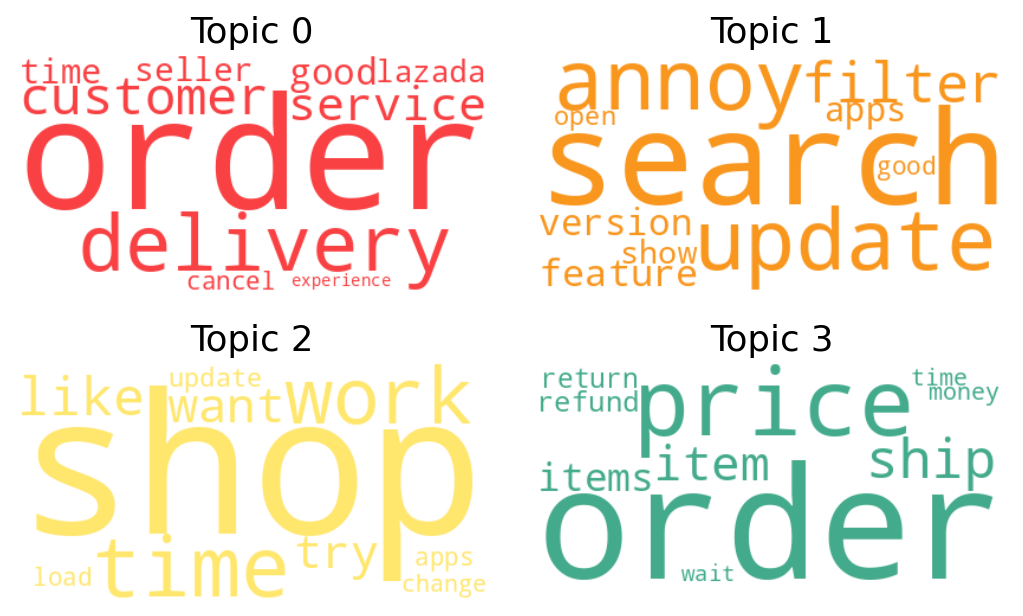

In [ ]:
topics_lda_base = lda_base_model.show_topics(formatted = False)

fig, axes = plt.subplots(2, 2, figsize = (8, 5),
                           sharex = True, sharey = True, dpi = 160)

for i, ax in enumerate(axes.flatten()):
    topic_words = dict(topics_lda_base[i][1])
    wc.generate_from_frequencies(topic_words)
    ax.imshow(wc, interpolation="bilinear")
    ax.set_title("Topic " + str(i), fontdict = dict(size = 16))
    ax.axis("off")

plt.axis("off")
plt.subplots_adjust(wspace = 0.1, hspace = 0)
plt.margins(x=0, y=0)
plt.show()

Topic 0: Customer Service and Order Issues

Topic 1: User Interface and Application Functionality

Topic 2: General User Experience and Preferences

Topic 3: Order Issues and Refunds



##### Testing Data Topic Visualization

In [ ]:
visual_lda_base = pyLDAvis.gensim.prepare(topic_model = lda_base_model,
                                          corpus = corpus_test_bow,
                                          dictionary = dictionary)
pyLDAvis.enable_notebook()
pyLDAvis.display(visual_lda_base)

The figure above further shows that the first and fourth topic have some overlap in which both talk about the order services and experiences, while the second and third topics talk about different things altogether.


#### BoW and TFIDF - Base Model

In [ ]:
lda_base_tfidf_model = model_lda(dictionary, corpus_tfidf, 4, 0.7, 0.7)

##### Coherence Score

In [ ]:
lda_base_tfidf_coherence = coherence_score(lda_base_tfidf_model, processed_data, dictionary)
lda_base_tfidf_coherence

0.4031718753354382

##### Model's Topic

In [ ]:
model_topics(lda_base_tfidf_model)

Topic 0:
price: 0.010
good: 0.009
items: 0.008
easy: 0.008
shop: 0.007
lazada: 0.007
products: 0.007
great: 0.007
ship: 0.006
quality: 0.006

Topic 1:
order: 0.009
service: 0.008
cancel: 0.007
customer: 0.006
time: 0.006
money: 0.006
say: 0.005
delivery: 0.005
account: 0.005
refund: 0.005

Topic 2:
search: 0.011
update: 0.008
open: 0.007
user: 0.006
work: 0.006
annoy: 0.006
version: 0.006
phone: 0.006
filter: 0.005
need: 0.005

Topic 3:
shop: 0.006
order: 0.006
customer: 0.005
like: 0.005
slow: 0.005
good: 0.005
better: 0.005
time: 0.005
item: 0.004
service: 0.004



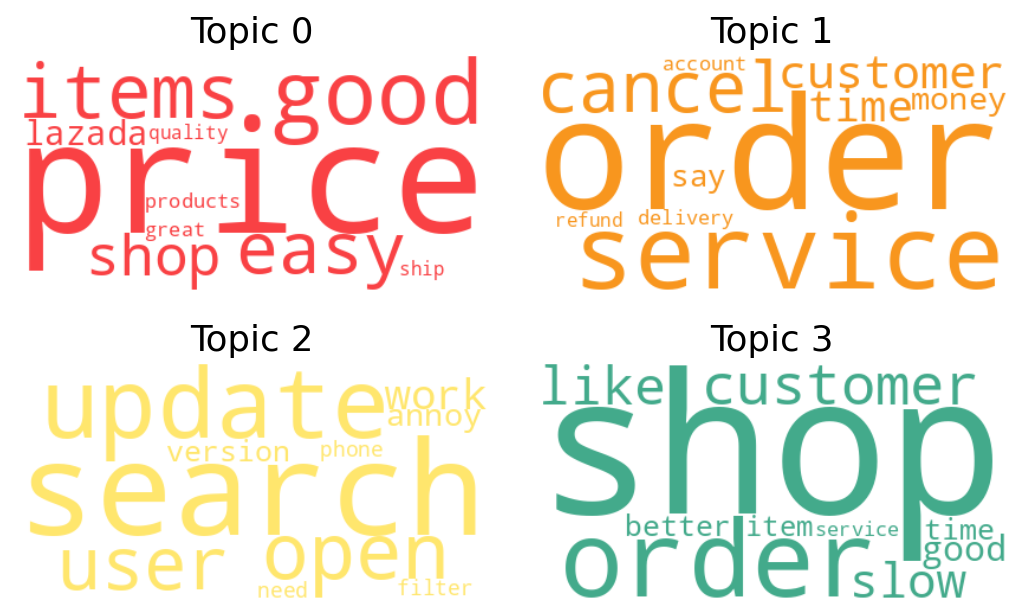

In [ ]:
topics_lda_tfidf_base = lda_base_tfidf_model.show_topics(formatted = False)

fig, axes = plt.subplots(2, 2, figsize = (8, 5),
                           sharex = True, sharey = True, dpi = 160)

for i, ax in enumerate(axes.flatten()):
    topic_words = dict(topics_lda_tfidf_base[i][1])
    wc.generate_from_frequencies(topic_words)
    ax.imshow(wc, interpolation="bilinear")
    ax.set_title("Topic " + str(i), fontdict = dict(size = 16))
    ax.axis("off")

plt.axis("off")
plt.subplots_adjust(wspace = 0.1, hspace = 0)
plt.margins(x=0, y=0)
plt.show()

Topic 0: Positive Experiences

Topic 1: Customer Service and Order Issues

Topic 2: User Interface and Application Functionality

Topic 3: General Shopping Discussions



##### Testing Data Topic Visualization

In [ ]:
visual_lda_tfidf_base = pyLDAvis.gensim.prepare(topic_model = lda_base_tfidf_model,
                                          corpus = corpus_test_tfidf,
                                          dictionary = dictionary)
pyLDAvis.enable_notebook()
pyLDAvis.display(visual_lda_tfidf_base)

The figure above shows that each topic is different from the other with no overlap, although the second and fourth topic are close (similar) to each other talking about customer services and customer experience which have a causation relationship.


### LSA
Unlike the LDA model, LSA does not have as many hyperparameters, thus the base model will use 4 topics and false setting for onepass.

In [ ]:
def model_lsi(dictionary, corpus, num_topic):
    lsi_model = LsiModel(corpus,
                         num_topics = num_topic,
                         id2word = dictionary,
                         onepass = False)
    return lsi_model

#### BoW Only - Base Model

In [ ]:
lsi_base_model = model_lsi(dictionary, corpus_bow, 4)

##### Coherence Score

In [ ]:
lsi_base_model_coherence = coherence_score(lsi_base_model, processed_data, dictionary)
lsi_base_model_coherence

0.45560246720525055

##### Model's Topic

In [ ]:
model_topics(lsi_base_model)

Topic 0:
order: 0.459
time: 0.274
customer: 0.203
items: 0.188
service: 0.184
cancel: 0.169
item: 0.164
shop: 0.159
delivery: 0.155
good: 0.149

Topic 1:
order: -0.655
cancel: -0.237
search: 0.218
shop: 0.215
update: 0.169
good: 0.163
like: 0.157
need: 0.126
work: 0.116
apps: 0.113

Topic 2:
service: 0.478
customer: 0.452
order: -0.328
delivery: 0.247
search: -0.239
price: -0.215
items: -0.195
lazada: 0.190
ship: -0.130
filter: -0.112

Topic 3:
price: 0.354
time: -0.288
shop: 0.288
items: 0.264
ship: 0.243
good: 0.237
update: -0.217
search: -0.194
account: -0.185
lazada: 0.184



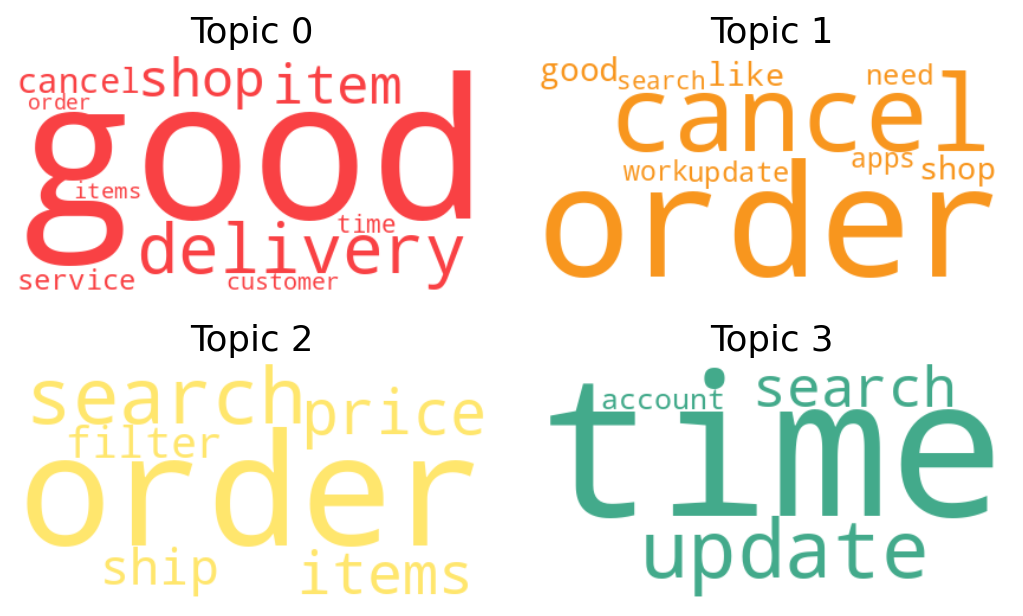

In [ ]:
topic_lsi_base = lsi_base_model.show_topics(formatted = False)

fig, axes = plt.subplots(2, 2, figsize = (8, 5),
                           sharex = True, sharey = True, dpi = 160)

for i, ax in enumerate(axes.flatten()):
    topic_words = dict(topic_lsi_base[i][1])
    wc.generate_from_frequencies(topic_words)
    ax.imshow(wc, interpolation="bilinear")
    ax.set_title("Topic " + str(i), fontdict = dict(size = 16))
    ax.axis("off")

plt.axis("off")
plt.subplots_adjust(wspace = 0.1, hspace = 0)
plt.margins(x=0, y=0)
plt.show()

Topic 0: Order Management

Topic 1: Browsing and User Preferences

Topic 2: General Customer Service and Experiences

Topic 3: Price and Shopping Discussions


##### Testing Data Topic Visualization

In [ ]:
lsi_corpus = lsi_base_model[corpus_test_bow]

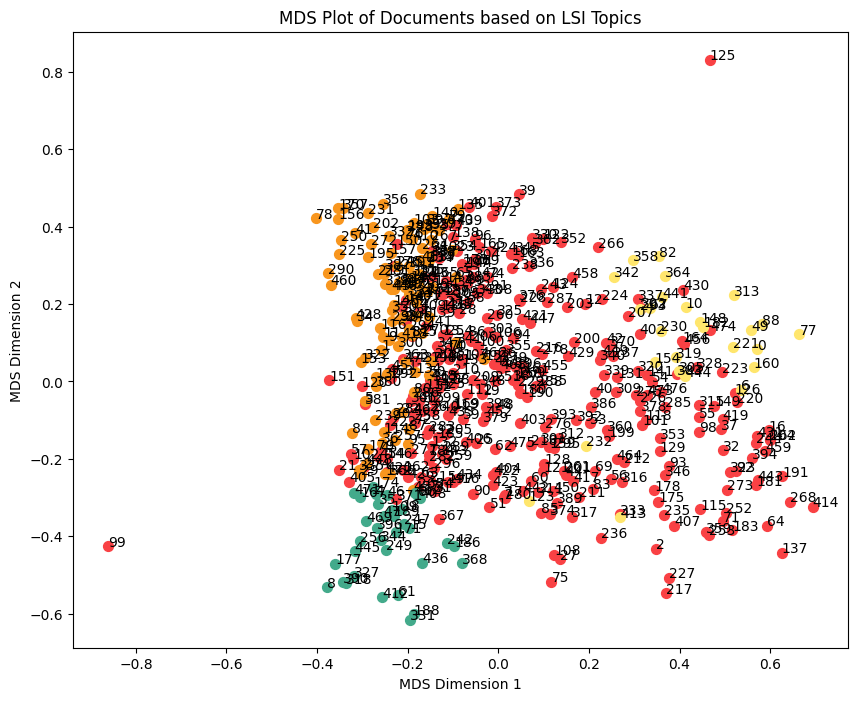

In [ ]:
# Extract document-topic distributions from LSI model
doc_topic_dist = np.zeros((len(corpus_test_bow), lsi_base_model.num_topics))

for i, doc in enumerate(lsi_corpus):
    for topic_id, topic_prob in doc:
        doc_topic_dist[i, topic_id] = topic_prob

# Compute cosine similarity matrix between documents
doc_similarity = cosine_similarity(doc_topic_dist)

# Apply MDS to reduce dimensionality
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
doc_coords = mds.fit_transform(1 - doc_similarity)  # Use 1 - similarity for distance

topics = np.argmax(doc_topic_dist, axis=1)

# Plotting
plt.figure(figsize=(10, 8))
for topic_id in range(lsi_base_model.num_topics):
  mask = topics == topic_id
  plt.scatter(doc_coords[mask, 0], doc_coords[mask, 1],
              color = list_colors[topic_id], s = 50,
              marker='o', label=f'Topic {topic_id}')

plt.title('MDS Plot of Documents based on LSI Topics')
plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')

# Optionally label points with document indices or other metadata
for i, txt in enumerate(range(len(doc_coords))):
    plt.annotate(txt, (doc_coords[i, 0], doc_coords[i, 1]))

plt.show()

The MDS plot above shows that while most user reviews of each topic are far apart from each other, there is some overlap between them. This indicates that although the reviews can be classified into four different topics based on the common keywords, it is not surprising if there is some similarity between different topics since the underlying semantic structure talks about only e-commerce.


#### BoW and TFIDF - Base Model

In [ ]:
lsi_base_tfidf_model = model_lsi(dictionary, corpus_tfidf, 4)

##### Coherence Score

In [ ]:
lsi_base_tfidf_model_coherence = coherence_score(lsi_base_tfidf_model, processed_data, dictionary)
lsi_base_tfidf_model_coherence

0.4162059992849973

##### Model's Topic

In [ ]:
model_topics(lsi_base_tfidf_model)

Topic 0:
order: 0.218
good: 0.165
time: 0.158
shop: 0.153
items: 0.148
service: 0.141
customer: 0.139
delivery: 0.134
like: 0.131
lazada: 0.129

Topic 1:
order: 0.318
search: -0.304
open: -0.231
cancel: 0.207
update: -0.195
delivery: 0.184
customer: 0.168
annoy: -0.162
version: -0.160
filter: -0.158

Topic 2:
price: -0.363
easy: -0.281
good: -0.251
shop: -0.224
products: -0.217
great: -0.184
best: -0.163
quality: -0.152
love: -0.149
ship: -0.147

Topic 3:
search: -0.478
filter: -0.268
shop: 0.240
result: -0.195
apps: 0.194
open: 0.189
easy: 0.170
good: 0.151
online: 0.150
phone: 0.130



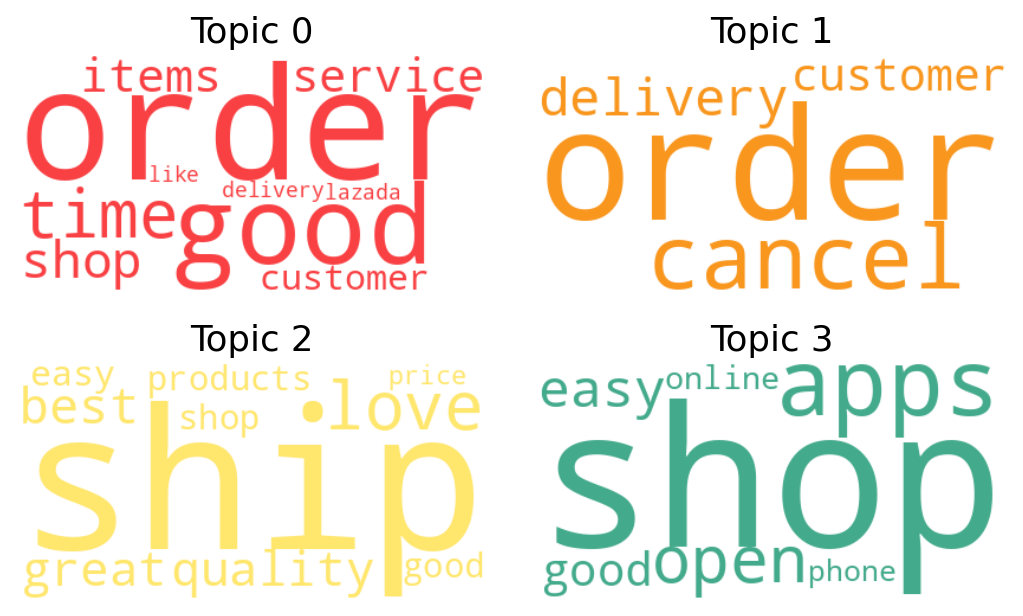

In [ ]:
topic_lsi_tfidf_base = lsi_base_tfidf_model.show_topics(formatted = False)

fig, axes = plt.subplots(2, 2, figsize = (8, 5),
                           sharex = True, sharey = True, dpi = 160)

for i, ax in enumerate(axes.flatten()):
    topic_words = dict(topic_lsi_tfidf_base[i][1])
    wc.generate_from_frequencies(topic_words)
    ax.imshow(wc, interpolation="bilinear")
    ax.set_title("Topic " + str(i), fontdict = dict(size = 16))
    ax.axis("off")

plt.axis("off")
plt.subplots_adjust(wspace = 0.1, hspace = 0)
plt.margins(x=0, y=0)
plt.show()

Topic 0: General Shopping Discussions

Topic 1: Frustrations about Order Issues

Topic 2: Price Sensitivity

Topic 3: Browsing and Application Issues


##### Testing Data Topic Visualization

In [ ]:
lsi_corpus_tfidf = lsi_base_tfidf_model[corpus_test_tfidf]

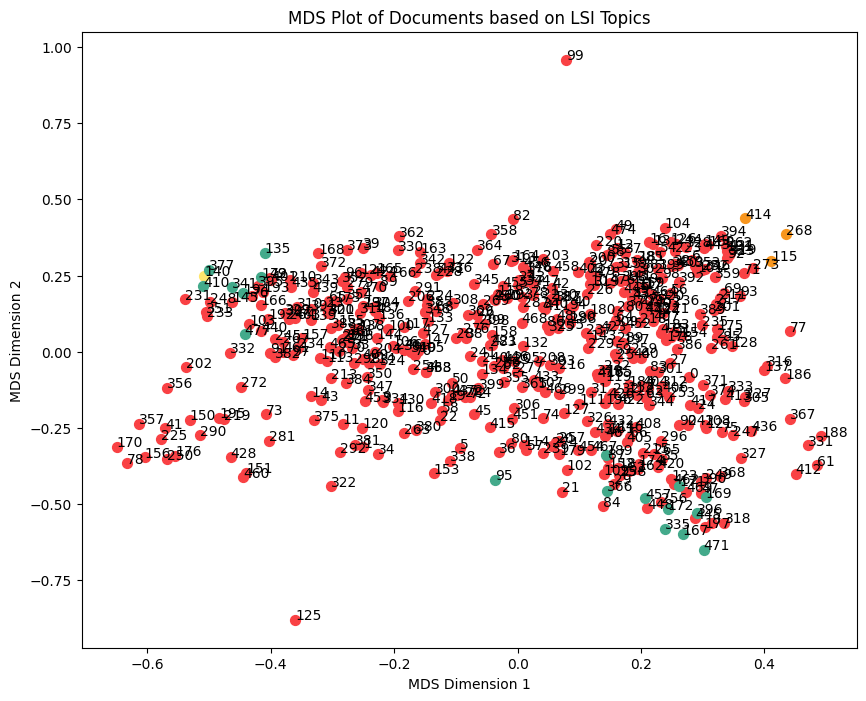

In [ ]:
# Extract document-topic distributions from LSI model
doc_topic_dist = np.zeros((len(corpus_test_tfidf), lsi_base_tfidf_model.num_topics))

for i, doc in enumerate(lsi_corpus_tfidf):
    for topic_id, topic_prob in doc:
        doc_topic_dist[i, topic_id] = topic_prob

# Compute cosine similarity matrix between documents
from sklearn.metrics.pairwise import cosine_similarity
doc_similarity = cosine_similarity(doc_topic_dist)

# Apply MDS to reduce dimensionality
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
doc_coords = mds.fit_transform(1 - doc_similarity)  # Use 1 - similarity for distance

topics = np.argmax(doc_topic_dist, axis=1)

# Plotting
plt.figure(figsize=(10, 8))
for topic_id in range(lsi_base_tfidf_model.num_topics):
  mask = topics == topic_id
  plt.scatter(doc_coords[mask, 0], doc_coords[mask, 1],
              color = list_colors[topic_id], s = 50,
              marker='o', label=f'Topic {topic_id}')

plt.title('MDS Plot of Documents based on LSI Topics')
plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')

# Optionally label points with document indices or other metadata
for i, txt in enumerate(range(len(doc_coords))):
    plt.annotate(txt, (doc_coords[i, 0], doc_coords[i, 1]))

plt.show()

This plot shows that most user reviews are similar to each other, since almost all of them overlap with each other, even though it was classified into four different topics. This could be because even if there are keywords that differentiate between topics, it is safe to say that there will be some common keywords across all topics since this database is specific to only user reviews from e-commerce applications.


## Parameter Tuning
After all four base models are built and the outputs are explained, the hyperparameters can be tuned to hopefully create a better model for the topic prediction task. This step is done by iterating the hyperparameters update based on the list that has been made and check if the coherence score of that updated model is higher than the highest coherence score so far.

In [ ]:
num_topics_list = [3, 4, 5, 6]
alpha_list = [0.5, 0.7, 0.8, 0.9]
eta_list = [0.5, 0.7, 0.8, 0.9]

### LDA
The tuned model will use four different numbers of topics, which are: 3, 4, 5, and 6, four different alpha and eta, which are: 0.5, 0.7, 0.8, and 0.9. Also, it uses 20 passes, 2 workers, and 150 iterations to reach convergence.

#### BoW Only - Tuned Model

In [ ]:
best_score_lda = 0
best_params_lda = {}

for num_topics in num_topics_list:
    for alpha in alpha_list:
        for eta in eta_list:
          lda_tuned_model = gensim.models.LdaMulticore(corpus_bow,
                                                       num_topics=num_topics,
                                                       id2word=dictionary,
                                                       passes=20,
                                                       iterations = 150,
                                                       workers=2,
                                                       alpha=alpha,
                                                       eta=eta)
          coherence_score_value = coherence_score(lda_tuned_model, processed_data, dictionary)

          if coherence_score_value > best_score_lda:
                best_score_lda = coherence_score_value
                best_params_lda = {'num_topics': num_topics, 'alpha': alpha, 'eta': eta}
                best_model_lda = lda_tuned_model

print(f'Best Coherence Score: {best_score_lda}')
print(f'Best Parameters: {best_params_lda}')

Best Coherence Score: 0.5055593592802066
Best Parameters: {'num_topics': 5, 'alpha': 0.5, 'eta': 0.8}


##### Model's Topic

In [ ]:
model_topics(best_model_lda)

Topic 0:
update: 0.026
open: 0.019
time: 0.016
work: 0.015
apps: 0.014
phone: 0.014
annoy: 0.013
try: 0.012
load: 0.011
page: 0.011

Topic 1:
shop: 0.030
price: 0.028
good: 0.025
products: 0.020
items: 0.019
like: 0.017
easy: 0.016
online: 0.013
love: 0.013
ship: 0.013

Topic 2:
order: 0.029
account: 0.024
cancel: 0.019
number: 0.017
money: 0.017
send: 0.015
seller: 0.014
email: 0.013
refund: 0.013
say: 0.013

Topic 3:
order: 0.042
customer: 0.032
service: 0.030
delivery: 0.028
time: 0.022
lazada: 0.017
item: 0.016
deliver: 0.011
days: 0.011
cancel: 0.011

Topic 4:
search: 0.039
user: 0.020
filter: 0.020
version: 0.016
need: 0.013
seller: 0.012
better: 0.012
feature: 0.012
time: 0.011
product: 0.011



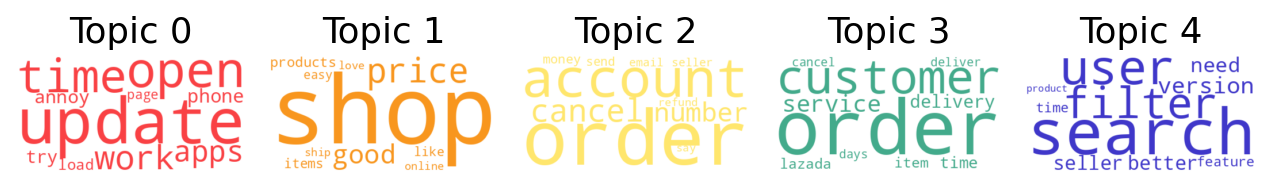

In [ ]:
topics_lda_tuned = best_model_lda.show_topics(formatted = False)

fig, axes = plt.subplots(1, 5, figsize = (10, 8),
                           sharex = True, sharey = True, dpi = 160)

for i, ax in enumerate(axes.flatten()):
    topic_words = dict(topics_lda_tuned[i][1])
    wc.generate_from_frequencies(topic_words)
    ax.imshow(wc, interpolation="bilinear")
    ax.set_title("Topic " + str(i), fontdict = dict(size = 16))
    ax.axis("off")

plt.axis("off")
plt.subplots_adjust(wspace = 0.1, hspace = 0)
plt.margins(x=0, y=0)
plt.show()

Topic 0: Application Issues

Topic 1: Shopping Interests

Topic 2: Order Management

Topic 3: Customer Service

Topic 4: Browsing and User Experience



##### Testing Data Topics Visualization

In [ ]:
visual_lda_tuned = pyLDAvis.gensim.prepare(topic_model = best_model_lda,
                                          corpus = corpus_test_bow,
                                          dictionary = dictionary)
pyLDAvis.enable_notebook()
pyLDAvis.display(visual_lda_tuned)

The figure above acts as further proof that the tuned model seems to have captured the original topics from the base model with more granularity with no overlap between topics. Though the first and fourth topic are close with each other and so does the second and fifth which indicates similarity between the two. The tuned model also identified a new topic related to search and user experience, and potentially distributed some words from the original broader topics into more specific ones.

#### BoW and TFIDF - Tuned Model

In [ ]:
best_score_lda_tfidf = 0
best_params_lda_tfidf = {}

for num_topics in num_topics_list:
    for alpha in alpha_list:
        for eta in eta_list:
          lda_tfidf_tuned_model = gensim.models.LdaMulticore(corpus_tfidf,
                                                       num_topics=num_topics,
                                                       id2word=dictionary,
                                                       passes=20,
                                                       iterations = 150,
                                                       workers=2,
                                                       alpha=alpha,
                                                       eta=eta)
          coherence_score_value_tfidf = coherence_score(lda_tfidf_tuned_model, processed_data, dictionary)

          if coherence_score_value_tfidf > best_score_lda_tfidf:
                best_score_lda_tfidf = coherence_score_value_tfidf
                best_params_lda_tfidf = {'num_topics': num_topics, 'alpha': alpha, 'eta': eta}
                best_model_lda_tfidf = lda_tfidf_tuned_model

print(f'Best Coherence Score: {best_score_lda_tfidf}')
print(f'Best Parameters: {best_params_lda_tfidf}')

Best Coherence Score: 0.5121826487550626
Best Parameters: {'num_topics': 3, 'alpha': 0.5, 'eta': 0.8}


##### Model's Topics

In [ ]:
model_topics(best_model_lda_tfidf)

Topic 0:
search: 0.012
update: 0.009
open: 0.009
annoy: 0.008
apps: 0.007
work: 0.007
filter: 0.007
version: 0.007
load: 0.006
page: 0.006

Topic 1:
order: 0.012
customer: 0.009
service: 0.009
cancel: 0.007
delivery: 0.007
account: 0.006
send: 0.006
chat: 0.006
seller: 0.006
deliver: 0.006

Topic 2:
price: 0.012
good: 0.011
ship: 0.010
shop: 0.009
items: 0.009
easy: 0.009
great: 0.008
discount: 0.007
online: 0.007
products: 0.007



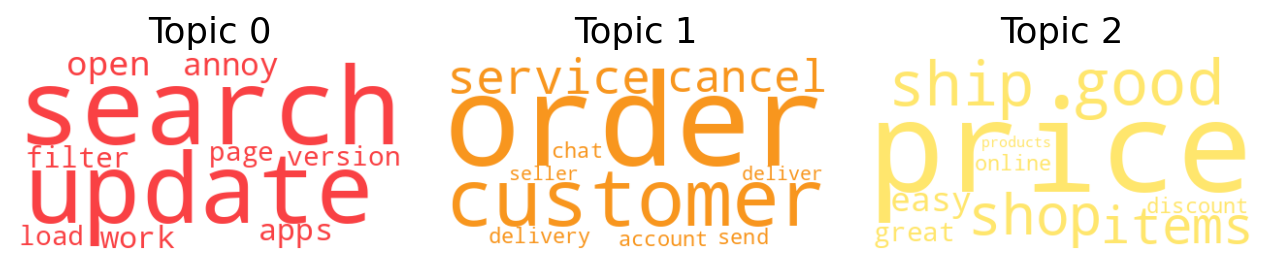

In [ ]:
topics_lda_tfidf_tuned = best_model_lda_tfidf.show_topics(formatted = False)

fig, axes = plt.subplots(1, 3, figsize = (10, 8),
                           sharex = True, sharey = True, dpi = 160)

for i, ax in enumerate(axes.flatten()):
    topic_words = dict(topics_lda_tfidf_tuned[i][1])
    wc.generate_from_frequencies(topic_words)
    ax.imshow(wc, interpolation="bilinear")
    ax.set_title("Topic " + str(i), fontdict = dict(size = 16))
    ax.axis("off")

plt.axis("off")
plt.subplots_adjust(wspace = 0.1, hspace = 0)
plt.margins(x=0, y=0)
plt.show()

Topic 0: Application Issues

Topic 1: Customer Service Interactions

Topic 2: Positive Shopping Experience


##### Testing Data Topics Visualization

In [ ]:
visual_lda_tfidf_tuned = pyLDAvis.gensim.prepare(topic_model = best_model_lda_tfidf,
                                          corpus = corpus_test_tfidf,
                                          dictionary = dictionary)
pyLDAvis.enable_notebook()
pyLDAvis.display(visual_lda_tfidf_tuned)

The figure above acts as further proof that the tuned model seems to have captured the original topics from the base model with more granularity with more distance (less similarity) between topics. The base model combines the order issues and customer service aspects into one topic (Topic 1) while the tuned model separates them. In the tuned model the general shopping discussion disappears which suggests that the tuning process identified more specific and distinct discussion within the corpus.

### LSA
Unlike the LDA model, the LSA model tuning only has one hyperparameter tuned which is the numbers of topics, which are: 3, 4, 5, and 6.

#### BoW Only - Tuned Model

In [ ]:
best_score_lsi = 0
best_params_lsi = {}

for num_topics in num_topics_list:
    lsi_tuned_model = LsiModel(corpus=corpus_bow,
                               num_topics=num_topics,
                               id2word=dictionary)

    coherence_score_value_lsi = coherence_score(lsi_tuned_model, processed_data, dictionary)

    if coherence_score_value_lsi > best_score_lsi:
        best_score_lsi = coherence_score_value_lsi
        best_params_lsi = {'num_topics': num_topics}
        best_model_lsi = lsi_tuned_model

print(f'Best Coherence Score: {best_score_lsi}')
print(f'Best Parameters: {best_params_lsi}')

Best Coherence Score: 0.48214099411580424
Best Parameters: {'num_topics': 5}


##### Model's Topics

In [ ]:
model_topics(best_model_lsi)

Topic 0:
order: 0.459
time: 0.274
customer: 0.203
items: 0.188
service: 0.184
cancel: 0.169
item: 0.164
shop: 0.159
delivery: 0.155
good: 0.149

Topic 1:
order: 0.655
cancel: 0.237
search: -0.217
shop: -0.215
update: -0.170
good: -0.163
like: -0.157
need: -0.126
work: -0.116
apps: -0.113

Topic 2:
service: 0.478
customer: 0.452
order: -0.328
delivery: 0.247
search: -0.239
price: -0.215
items: -0.195
lazada: 0.190
ship: -0.131
filter: -0.112

Topic 3:
price: 0.353
time: -0.289
shop: 0.288
items: 0.264
ship: 0.242
good: 0.237
update: -0.218
search: -0.195
account: -0.187
lazada: 0.184

Topic 4:
time: 0.400
search: -0.399
item: -0.278
customer: -0.274
shop: 0.257
items: -0.254
delivery: 0.217
service: -0.203
good: 0.199
refund: -0.169



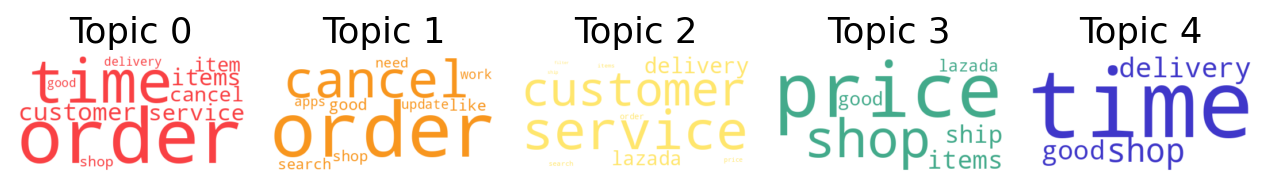

In [ ]:
topic_lsi_tuned = best_model_lsi.show_topics(formatted = False)

fig, axes = plt.subplots(1, 5,  figsize = (10, 8),
                           sharex = True, sharey = True, dpi = 160)

for i, ax in enumerate(axes.flatten()):
    topic_words = dict(topic_lsi_tuned[i][1])
    wc.generate_from_frequencies(topic_words)
    ax.imshow(wc, interpolation="bilinear")
    ax.set_title("Topic " + str(i), fontdict = dict(size = 16))
    ax.axis("off")

plt.axis("off")
plt.subplots_adjust(wspace = 0.1, hspace = 0)
plt.margins(x=0, y=0)
plt.show()

Topic 0: Order Focus

Topic 1: Browsing and Shopping Issues

Topic 2: Customer Service

Topic 3: Price and Shopping Discussions

Topic 4: Time-Related Issues



##### Testing Data Topics Visualization

In [ ]:
lsi_corpus_3 = best_model_lsi[corpus_test_bow]

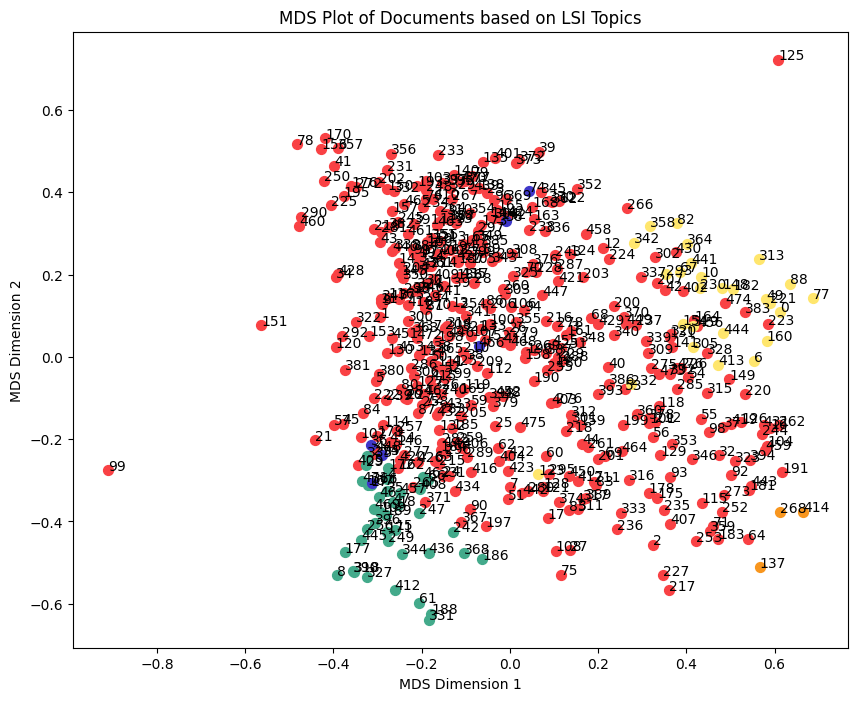

In [ ]:
# Extract document-topic distributions from LSI model
doc_topic_dist = np.zeros((len(corpus_test_bow), best_model_lsi.num_topics))

for i, doc in enumerate(lsi_corpus_3):
    for topic_id, topic_prob in doc:
        doc_topic_dist[i, topic_id] = topic_prob

# Compute cosine similarity matrix between documents
doc_similarity = cosine_similarity(doc_topic_dist)

# Apply MDS to reduce dimensionality
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
doc_coords = mds.fit_transform(1 - doc_similarity)  # Use 1 - similarity for distance

topics = np.argmax(doc_topic_dist, axis=1)

# Plotting
plt.figure(figsize=(10, 8))
for topic_id in range(best_model_lsi.num_topics):
  mask = topics == topic_id
  plt.scatter(doc_coords[mask, 0], doc_coords[mask, 1],
              color = list_colors[topic_id], s = 50,
              marker='o', label=f'Topic {topic_id}')

plt.title('MDS Plot of Documents based on LSI Topics')
plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')

# Optionally label points with document indices or other metadata
for i, txt in enumerate(range(len(doc_coords))):
    plt.annotate(txt, (doc_coords[i, 0], doc_coords[i, 1]))

plt.show()

Similar to the base model, the plot above shows similar results but with more granularity. This is proven by the appearance of a new topic of a time-related issues (Topic 4) and the separation of the order issues and customer focus (Topic 0 in base model) into two different topics (Topic 0 and Topic 1 in the tuned model).

#### BoW and TFIDF - Tuned Model

In [ ]:
best_score_lsi_tfidf = 0
best_params_lsi_tfidf = {}

for num_topics in num_topics_list:
    lsi_tfidf_tuned_model = LsiModel(corpus=corpus_tfidf,
                               num_topics=num_topics,
                               id2word=dictionary)

    coherence_score_value_lsi_tfidf = coherence_score(lsi_tfidf_tuned_model, processed_data, dictionary)

    if coherence_score_value_lsi_tfidf > best_score_lsi_tfidf:
        best_score_lsi_tfidf = coherence_score_value_lsi_tfidf
        best_params_lsi_tfidf = {'num_topics': num_topics}
        best_model_lsi_tfidf = lsi_tfidf_tuned_model

print(f'Best Coherence Score: {best_score_lsi_tfidf}')
print(f'Best Parameters: {best_params_lsi_tfidf}')

Best Coherence Score: 0.5115410606808685
Best Parameters: {'num_topics': 4}


##### Model's Topics

In [ ]:
model_topics(best_model_lsi_tfidf)

Topic 0:
order: -0.218
good: -0.165
time: -0.158
shop: -0.153
items: -0.148
service: -0.141
customer: -0.139
delivery: -0.135
like: -0.131
lazada: -0.129

Topic 1:
order: 0.317
search: -0.306
open: -0.230
cancel: 0.207
update: -0.195
delivery: 0.182
customer: 0.169
version: -0.162
filter: -0.160
service: 0.159

Topic 2:
price: -0.362
easy: -0.280
good: -0.249
shop: -0.224
products: -0.218
great: -0.182
best: -0.164
ship: -0.152
quality: -0.151
love: -0.147

Topic 3:
search: 0.475
filter: 0.263
shop: -0.240
apps: -0.197
result: 0.196
open: -0.190
easy: -0.173
good: -0.150
online: -0.146
version: 0.130



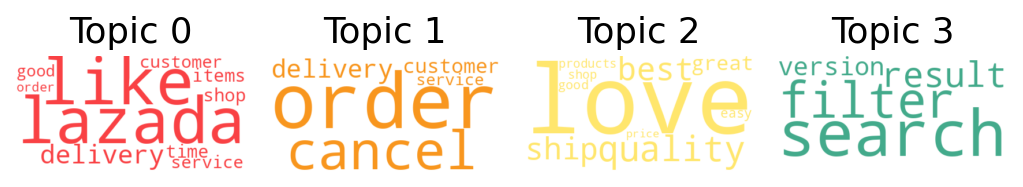

In [ ]:
topic_lsi_tfidf_tuned = best_model_lsi_tfidf.show_topics(formatted = False)

fig, axes = plt.subplots(1, 4,  figsize = (8, 5),
                           sharex = True, sharey = True, dpi = 160)

for i, ax in enumerate(axes.flatten()):
    topic_words = dict(topic_lsi_tfidf_tuned[i][1])
    wc.generate_from_frequencies(topic_words)
    ax.imshow(wc, interpolation="bilinear")
    ax.set_title("Topic " + str(i), fontdict = dict(size = 16))
    ax.axis("off")

plt.axis("off")
plt.subplots_adjust(wspace = 0.1, hspace = 0)
plt.margins(x=0, y=0)
plt.show()

Topic 0: Neutral Shopping Terms

Topic 1: Frustrations about Order Issues

Topic 2: Price Sensitivity

Topic 3: Browsing and Application Issues


##### Testing Data Topics Visualization

In [ ]:
lsi_corpus_4 = best_model_lsi_tfidf[corpus_test_tfidf]

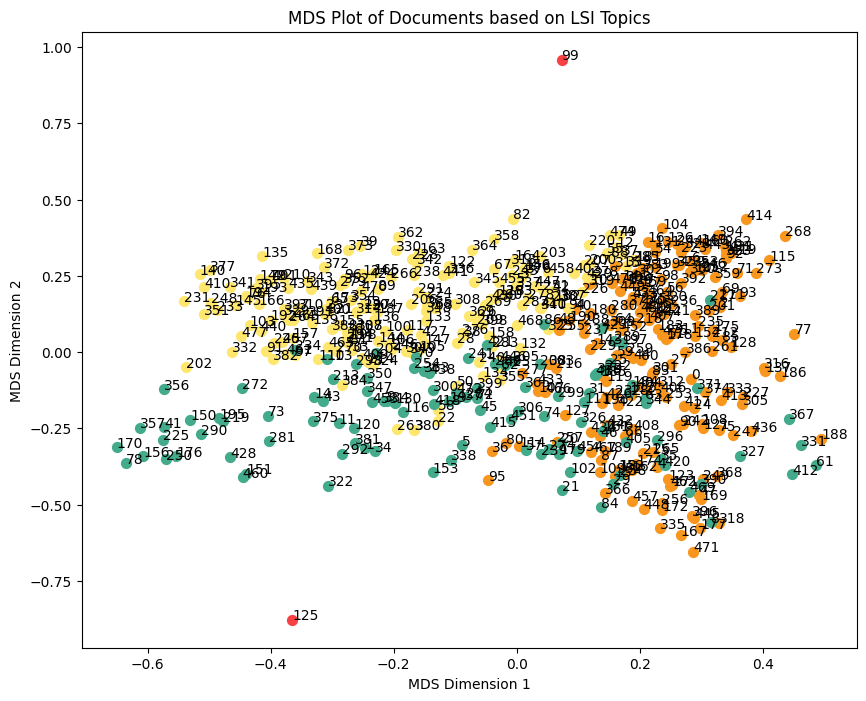

In [ ]:
# Extract document-topic distributions from LSI model
doc_topic_dist = np.zeros((len(corpus_test_tfidf), best_model_lsi_tfidf.num_topics))

for i, doc in enumerate(lsi_corpus_4):
    for topic_id, topic_prob in doc:
        doc_topic_dist[i, topic_id] = topic_prob

# Compute cosine similarity matrix between documents
doc_similarity = cosine_similarity(doc_topic_dist)

# Apply MDS to reduce dimensionality
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
doc_coords = mds.fit_transform(1 - doc_similarity)  # Use 1 - similarity for distance

topics = np.argmax(doc_topic_dist, axis=1)

# Plotting
plt.figure(figsize=(10, 8))
for topic_id in range(best_model_lsi_tfidf.num_topics):
  mask = topics == topic_id
  plt.scatter(doc_coords[mask, 0], doc_coords[mask, 1],
              color = list_colors[topic_id], s = 50,
              marker='o', label=f'Topic {topic_id}')

plt.title('MDS Plot of Documents based on LSI Topics')
plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')

# Optionally label points with document indices or other metadata
for i, txt in enumerate(range(len(doc_coords))):
    plt.annotate(txt, (doc_coords[i, 0], doc_coords[i, 1]))

plt.show()

Instead of overlap across the plot, the plot above shows more differentiation between each topic, albeit still having some overlap. The most significant change for this granularity is the flipped signs of the first topic (Topic 0) from positive to negative which means that those words are an exclusion of the topic and highlighting neutral terms used across various contexts.

## Summary
From the exploration above, it can be seen that:
1. LDA models focus on identifying broader categories which is effective for identifying dominant themes in large datasets, while LSA models focus on capturing sub-themes within broader categories which can lead to a more nuanced understanding of user discussions.
2. Corpus with BoW and TF-IDF methods have proven to refine the sub-themes within the dominant themes, but its weighting impact on sentiment analysis has not been explored.

Thus knowing the observation above it is safe to assume that:
1. Model 6 (BoW + TF-IDF, LDA, Tuned) has the largest coherence score and is a strong best model candidate. Though Model 5 (BoW, LDA, Tuned) is the safer choice since the impact of TF-IDF needs to be researched first.
2. Model 7 (BoW, LSA, Tuned) and 8  (BoW + TF-IDF, LSA, Tuned) are also a good candidates. Model 7 as a safer choice due to the need for further analysis on the impact of TF-IDF on sentiment analysis within topics in Model 8.

So, it can be concluded that for now it is safer to choode Model 5 for knowing broader topics and Model 7 for knowing detailed topics. But if future research have proven that TF-IDF does not negatively impact the sentiment analysis, then choose Model 6 for broader topics and Model 8 for detailed topics.